In [1]:
! pip install matplotlib=="3.8.0"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('../data/wind_speeds.csv')
print(df.dtypes)

lat                 float64
long                float64
wind_speed          float64
farm_type            object
capacity              int64
capacity_factor     float64
power_generation    float64
estimated_cost        int64
dtype: object


In [4]:
X = df.loc[:, df.columns[0:3]]
print(X)

              lat        long  wind_speed
0       23.510410 -117.147260        6.07
1       24.007446  -93.946777        7.43
2       25.069138  -97.482483        8.19
3       25.069443  -97.463135        8.19
4       25.069763  -97.443756        8.19
...           ...         ...         ...
126687  22.871800  -79.605350        7.50
126688  20.601960  -81.438600        6.67
126689  23.735790  -76.708770        7.22
126690  22.583120  -79.004090        7.61
126691  23.448720  -77.410400        7.31

[126692 rows x 3 columns]


In [5]:
K_clusters = range(1,100)

kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]

In [6]:
Y_axis = X[['lat']]
X_axis = X[['long']]

In [7]:
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

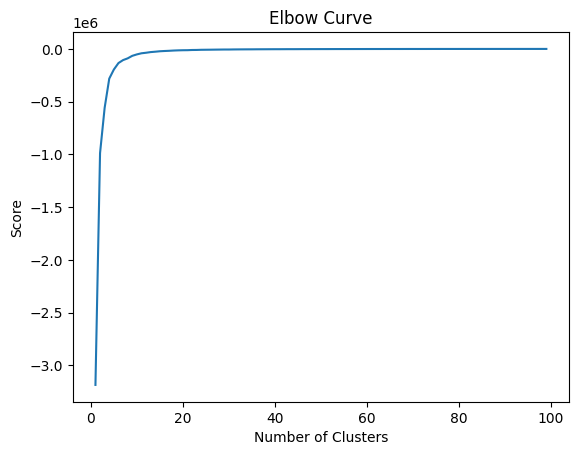

In [8]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 100, init='k-means++', n_init='auto')
kmeans.fit(X[X.columns[0:2]])

KMeans(n_clusters=100, n_init='auto')

In [10]:
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
print(X.head(10))

         lat        long  wind_speed  cluster_label
0  23.510410 -117.147260        6.07             20
1  24.007446  -93.946777        7.43              0
2  25.069138  -97.482483        8.19              0
3  25.069443  -97.463135        8.19              0
4  25.069763  -97.443756        8.19              0
5  25.070091  -97.424377        8.19              0
6  25.070404  -97.404999        8.19              0
7  25.086678  -97.482849        8.18              0
8  25.087006  -97.463470        8.19              0
9  25.087318  -97.444092        8.19              0


In [11]:
centers = kmeans.cluster_centers_
labels = kmeans.predict(X[X.columns[0:2]])

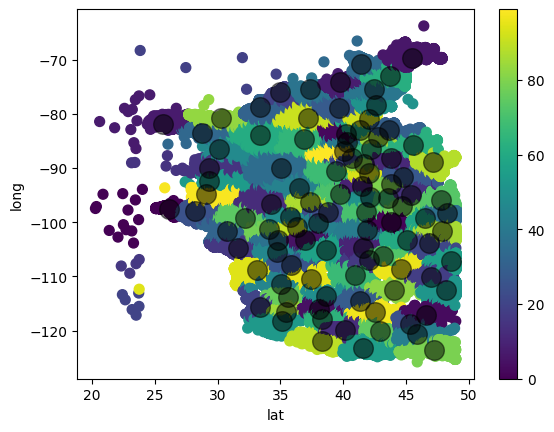

In [12]:
X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [13]:
X.to_csv('../data/cluster_output.csv', index=None, header=True)